In [1]:
import pymc3 as pm
import arviz as az

%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

n_Pfizer_total = 170
n_Pfizer_vaccine = 8
n_Pfizer_placebo = n_Pfizer_total - n_Pfizer_vaccine
Pfizer_outcomes = np.concatenate([np.zeros(n_Pfizer_vaccine), np.ones(n_Pfizer_placebo)])

n_Moderna_total = 95
n_Moderna_vaccine = 5
n_Moderna_placebo = n_Moderna_total - n_Moderna_vaccine
Moderna_outcomes = np.concatenate([np.zeros(n_Moderna_vaccine), np.ones(n_Moderna_placebo)])

n_AstraZeneca_1_total = 37
n_AstraZeneca_1_vaccine = 3
n_AstraZeneca_1_placebo = n_AstraZeneca_1_total - n_AstraZeneca_1_vaccine
AstraZeneca_1_outcomes = np.concatenate([np.zeros(n_AstraZeneca_1_vaccine), np.ones(n_AstraZeneca_1_placebo)])

n_AstraZeneca_2_total = 94
n_AstraZeneca_2_vaccine = 26
n_AstraZeneca_2_placebo = n_AstraZeneca_2_total - n_AstraZeneca_2_vaccine
AstraZeneca_2_outcomes = np.concatenate([np.zeros(n_AstraZeneca_2_vaccine), np.ones(n_AstraZeneca_2_placebo)])

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
with pm.Model() as model:
    
    p_Pfizer = pm.Beta('p_Pfizer', alpha=1, beta=1)
    p_Moderna = pm.Beta('p_Moderna', alpha=1, beta=1)
    p_regimen1 = pm.Beta('p_regimen1', alpha=1, beta=1)
    p_regimen2 = pm.Beta('p_regimen2', alpha=1, beta=1)
    
    like_Pfizer = pm.Bernoulli('like_Pfizer', p=p_Pfizer, observed=Pfizer_outcomes)
    like_Moderna = pm.Bernoulli('like_Moderna', p=p_Moderna, observed=Moderna_outcomes)
    like_regimen1 = pm.Bernoulli('like_regimen1', p=p_regimen1, observed=AstraZeneca_1_outcomes)
    like_regimen2 = pm.Bernoulli('like_regimen2', p=p_regimen2, observed=AstraZeneca_2_outcomes)
    
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

/opt/tljh/user/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -117.69, ||grad|| = 0.0049811: 100%|██████████| 14/14 [00:00<00:00, 1735.69it/s]  
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_regimen2]
>Metropolis: [p_regimen1]
>Metropolis: [p_Moderna]
>Metropolis: [p_Pfizer]
Sampling 2 chains: 100%|██████████| 101000/101000 [00:35<00:00, 2853.30draws/s]
The number of effective samples is smaller than 25% for some parameters.


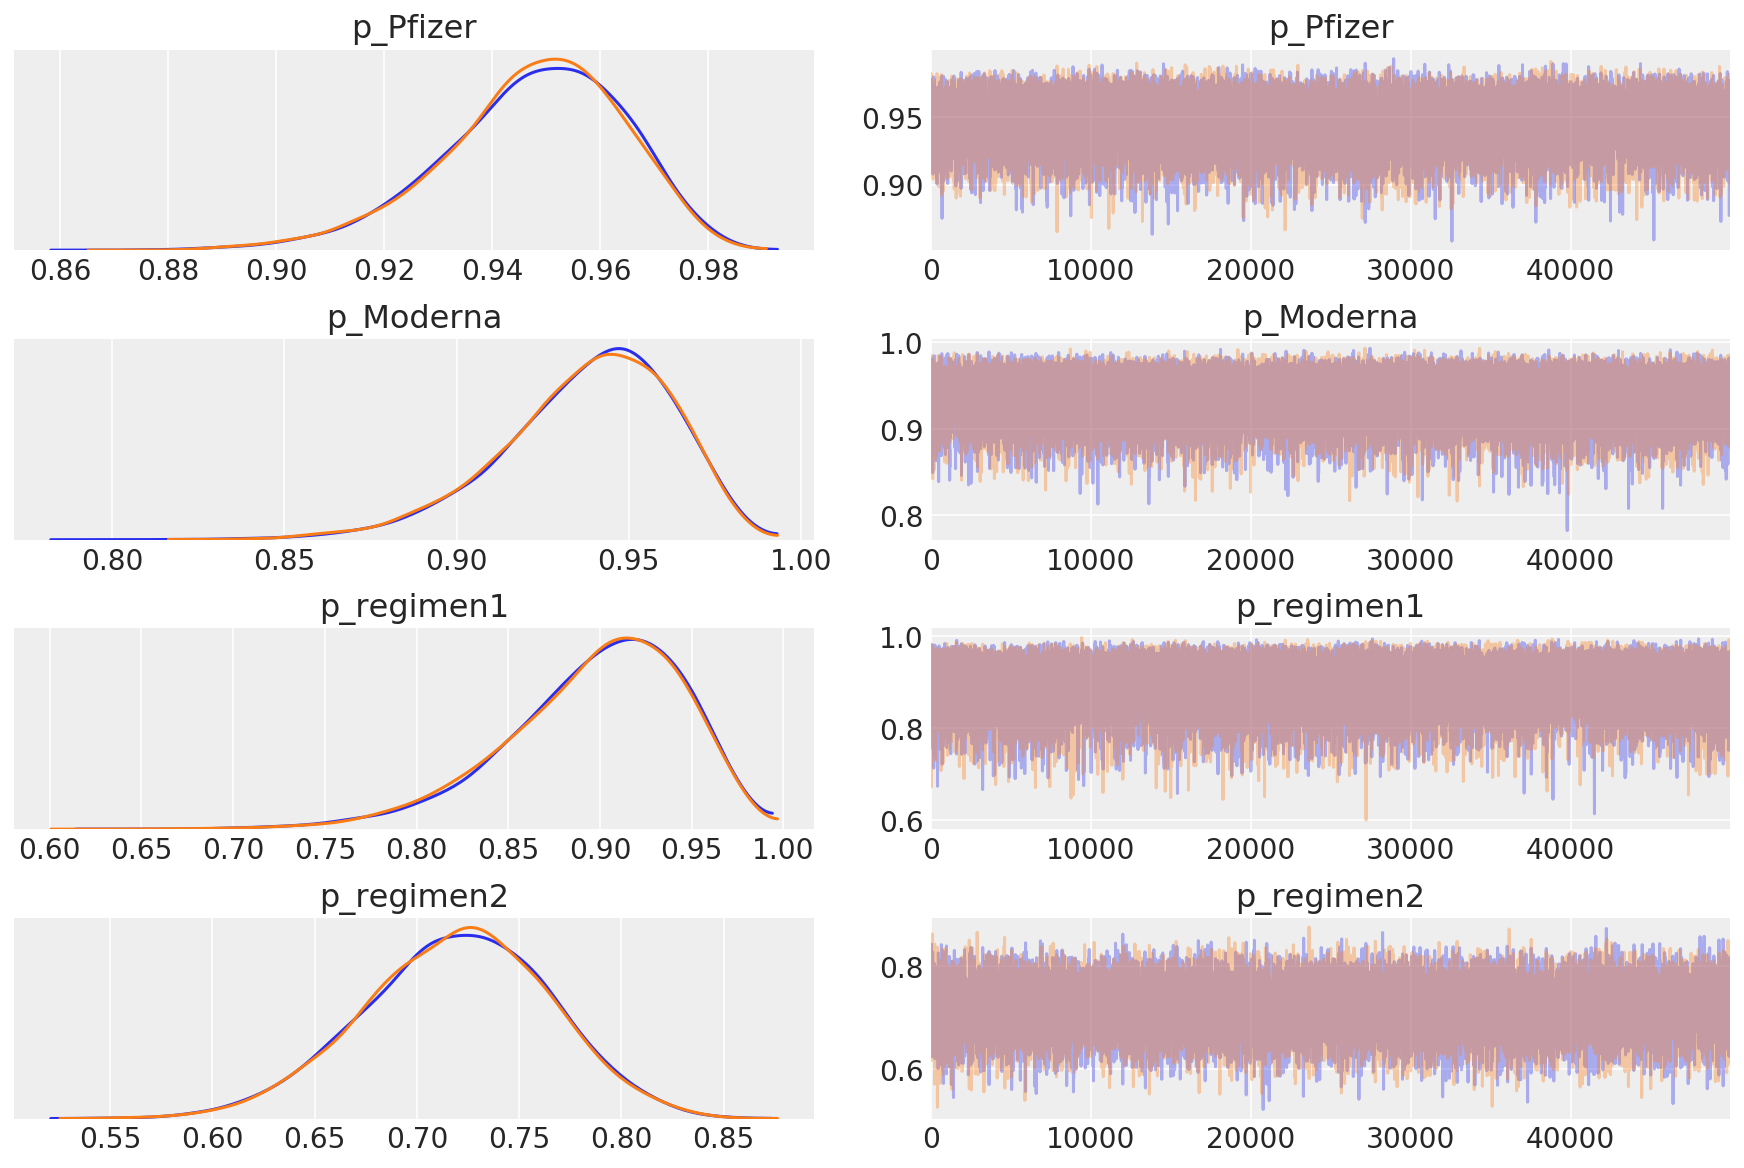

In [3]:
az.plot_trace(trace);

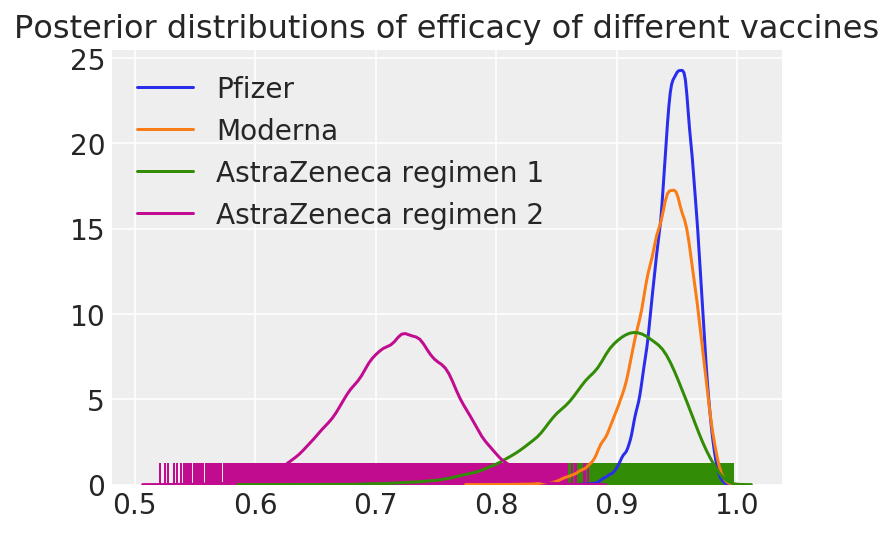

In [4]:
sns.distplot(trace['p_Pfizer'], hist=False, rug=True, label='Pfizer')
sns.distplot(trace['p_Moderna'], hist=False, rug=True, label='Moderna')
sns.distplot(trace['p_regimen1'], hist=False, rug=True, label='AstraZeneca regimen 1')
sns.distplot(trace['p_regimen2'], hist=False, rug=True, label='AstraZeneca regimen 2')
plt.title("Posterior distributions of efficacy of different vaccines")
plt.legend()
plt.show();

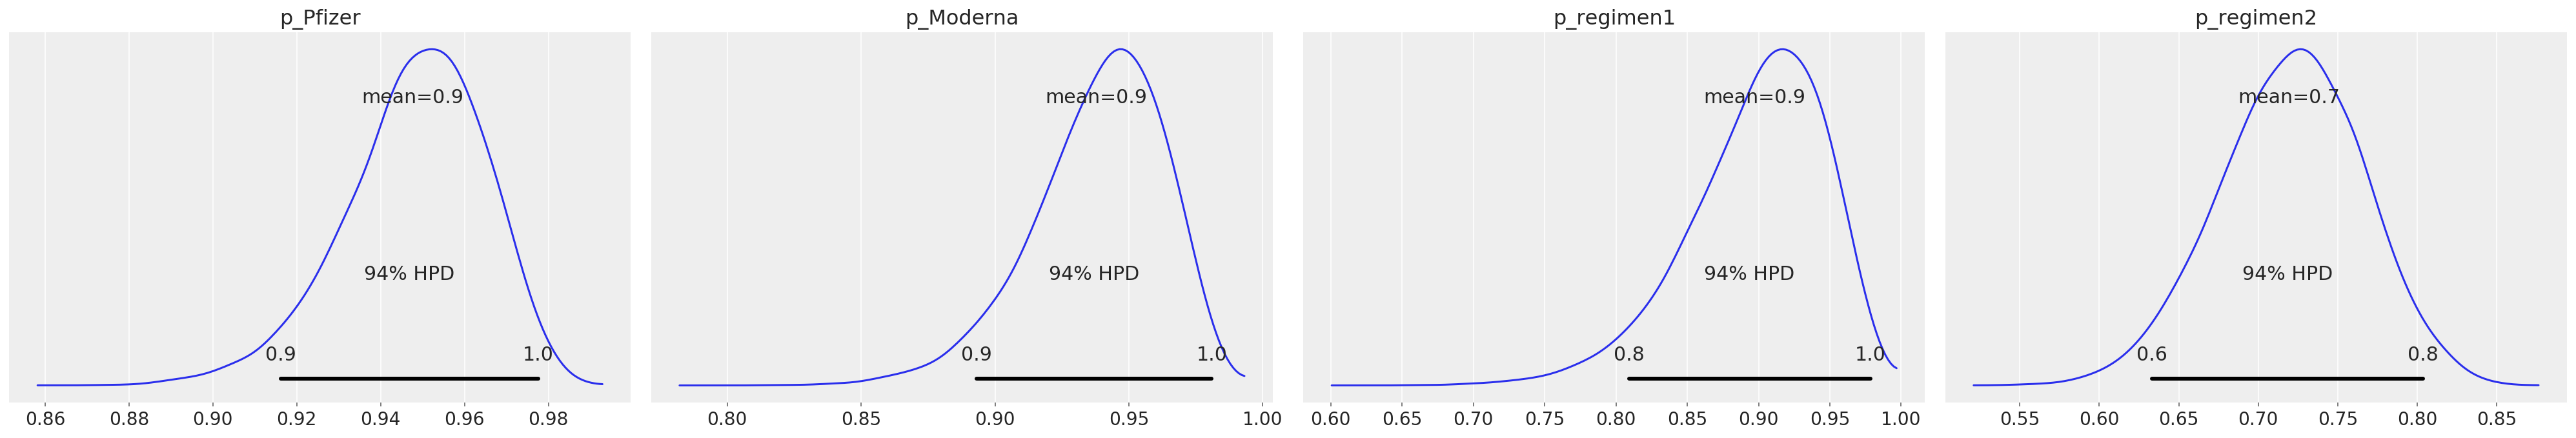

In [5]:
az.plot_posterior(trace);

/opt/tljh/user/lib/python3.6/site-packages/arviz/plots/forestplot.py:207: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/opt/tljh/user/lib/python3.6/site-packages/arviz/plots/forestplot.py:208: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False


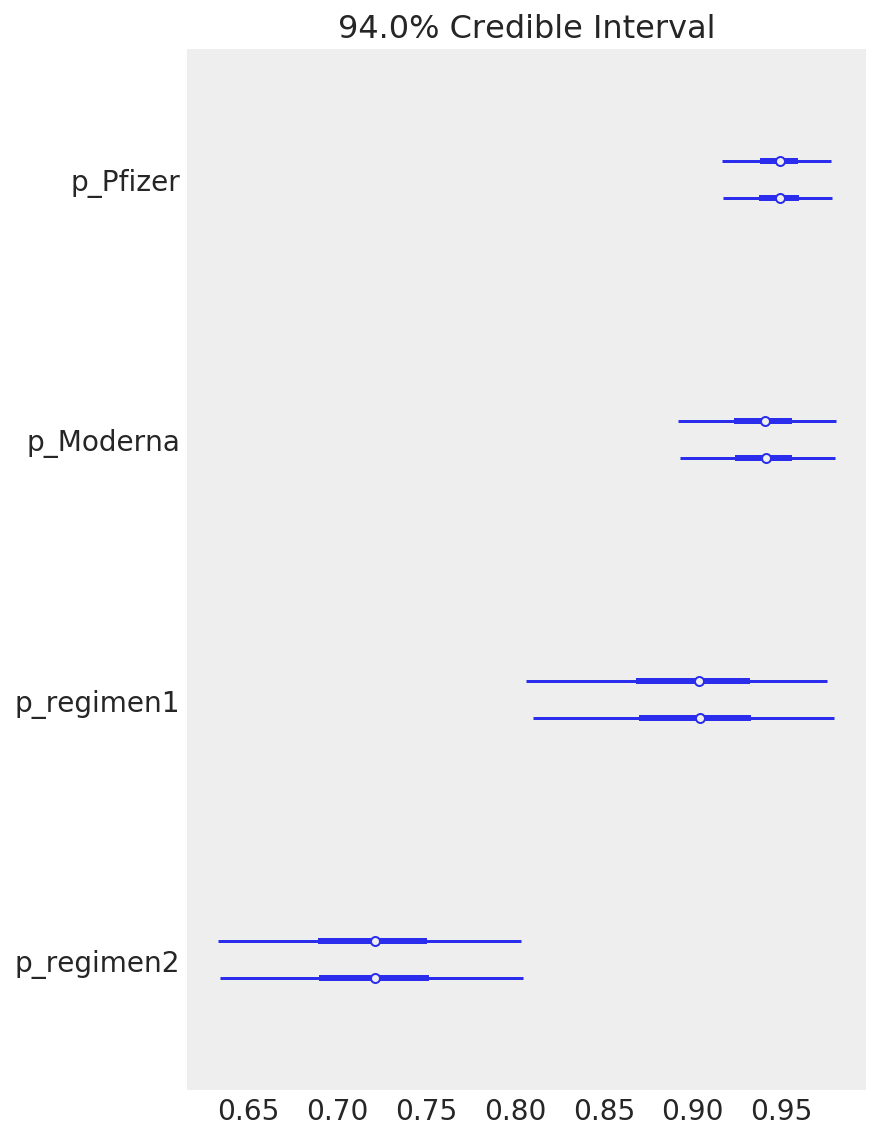

In [6]:
pm.forestplot(trace, var_names=['p_Pfizer', 'p_Moderna', 'p_regimen1', 'p_regimen2']);

In [7]:
with pm.Model() as model_1:
    
    p_Pfizer = pm.Beta('p_Pfizer', alpha=1, beta=1)
    p_Moderna = pm.Beta('p_Moderna', alpha=1, beta=1)
    
    like_Pfizer = pm.Bernoulli('like_Pfizer', p=p_Pfizer, observed=Pfizer_outcomes)
    like_Moderna = pm.Bernoulli('like_Moderna', p=p_Moderna, observed=Moderna_outcomes)
    
    pm.Deterministic('difference', p_Pfizer-p_Moderna)
    pm.Deterministic('relation', (p_Pfizer/p_Moderna)-1)
    
    trace_1 = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

/opt/tljh/user/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -183.68, ||grad|| = 87.95: 100%|██████████| 11/11 [00:00<00:00, 1658.72it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_Moderna]
>Metropolis: [p_Pfizer]
Sampling 2 chains: 100%|██████████| 101000/101000 [00:18<00:00, 5560.80draws/s]
The number of effective samples is smaller than 25% for some parameters.


/opt/tljh/user/lib/python3.6/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


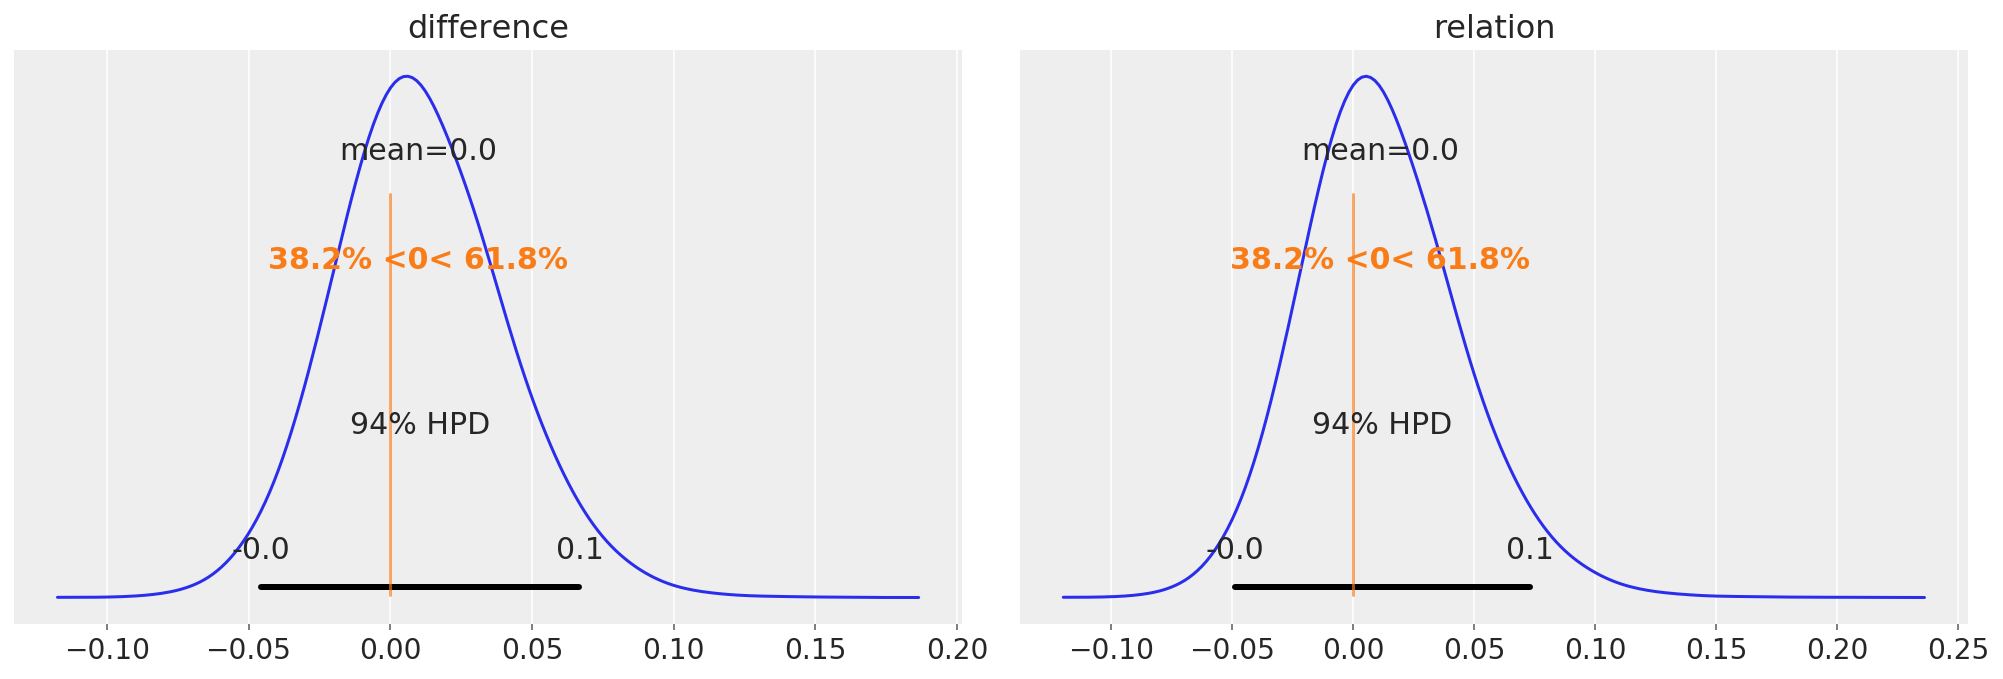

In [8]:
_ = pm.plot_posterior(trace_1, varnames=['difference', 'relation'], ref_val=0);

We can say that, for the two vaccines' difference, with 61% of the posterior probability are greater than zero, we can not rule out a difference of zero, which suggests the two vaccines are not credibly different.

In [9]:
diffs_1 = trace_1.get_values('difference', burn=1000)
100*len(diffs_1[diffs_1>0])*1.0/len(diffs_1)

61.816326530612244

In [10]:
with pm.Model() as model_2:
    
    p_regimen1 = pm.Beta('p_regimen1', alpha=1, beta=1)
    p_regimen2 = pm.Beta('p_regimen2', alpha=1, beta=1)
    
    like_regimen1 = pm.Bernoulli('like_regimen1', p=p_regimen1, observed=AstraZeneca_1_outcomes)
    like_regimen2 = pm.Bernoulli('like_regimen2', p=p_regimen2, observed=AstraZeneca_2_outcomes)
    
    pm.Deterministic('difference', p_regimen1-p_regimen2)
    pm.Deterministic('relation', (p_regimen1/p_regimen2)-1)
    
    trace_2 = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

/opt/tljh/user/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -90.802, ||grad|| = 26.101: 100%|██████████| 10/10 [00:00<00:00, 2436.00it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_regimen2]
>Metropolis: [p_regimen1]
Sampling 2 chains: 100%|██████████| 101000/101000 [00:18<00:00, 5387.70draws/s]
The number of effective samples is smaller than 25% for some parameters.


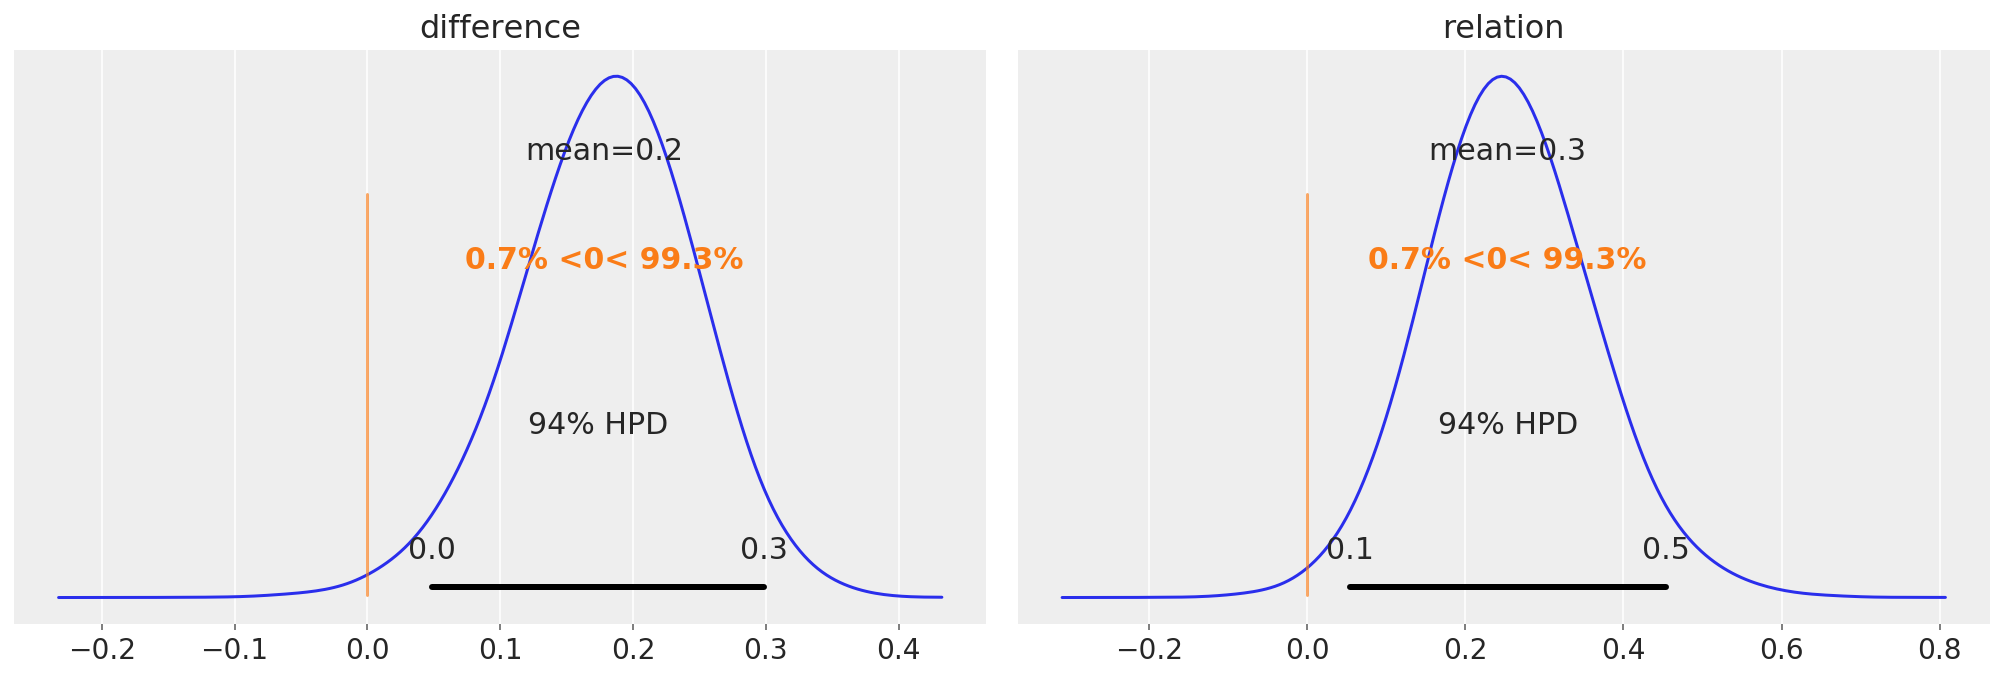

In [11]:
_ = pm.plot_posterior(trace_2, varnames=['difference', 'relation'], ref_val=0);

We have 99% confidence that regimen 1 is better than regimen 2.

In [12]:
diffs_2 = trace_2.get_values('difference', burn=1000)
100*len(diffs_2[diffs_2>0])*1.0/len(diffs_2)

99.29897959183674

Probability of regimen 1 more effective than regimen 2 by 6%

In [13]:
100*len(diffs_2[diffs_2>0.06])*1.0/len(diffs_2)

95.54591836734694

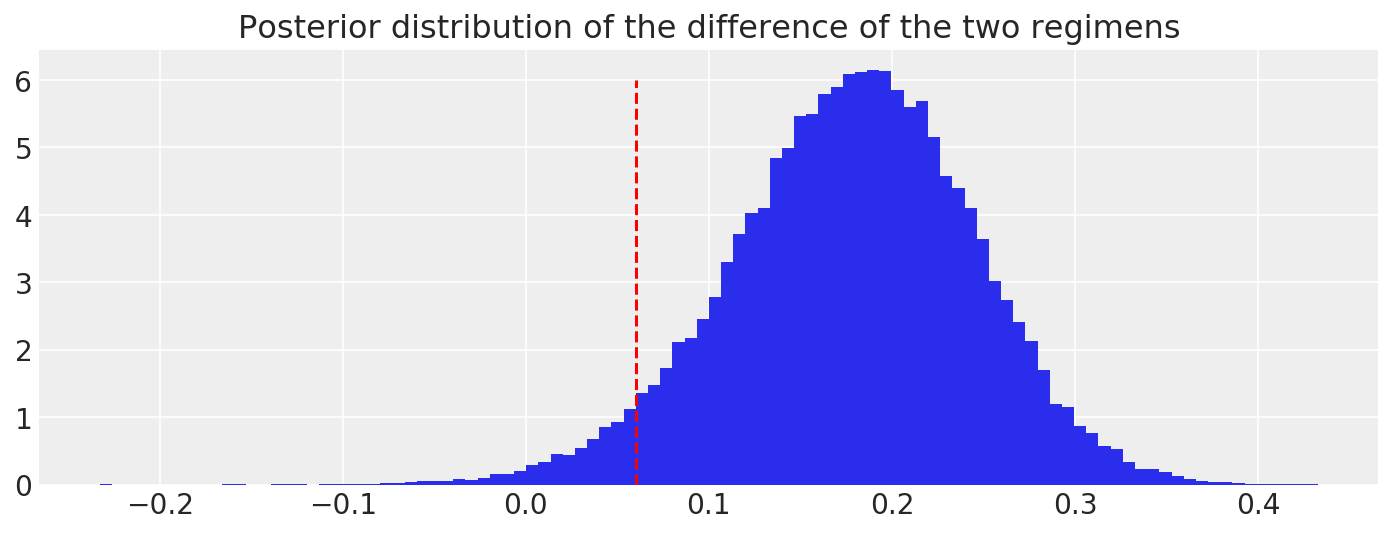

In [14]:
plt.figure(figsize=(12,4))
plt.hist(diffs_2, bins=100, density=True)
plt.vlines(0.06, 0, 6, linestyle='--', color='red')
plt.title('Posterior distribution of the difference of the two regimens')
plt.show();